In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [2]:
df = pd.read_csv('sales_clean_data.csv',low_memory=False)

In [3]:
data = df.copy()

In [4]:
data.head(2).T

,0,1
SalesID,1646770.0,1728883.0
SalePrice,9500.0,30000.0
MachineID,1126363.0,1523610.0
ModelID,8434.0,9105.0
datasource,132.0,132.0
auctioneerID,18.0,99.0
YearMade,1974.0,1986.0
MachineHoursCurrentMeter,0.0,0.0
UsageBand,0.0,0.0
fiModelDesc,4593.0,4772.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int64  
 9   fiModelDesc               412698 non-null  int64  
 10  fiBaseModel               412698 non-null  int64  
 11  fiSecondaryDesc           412698 non-null  int64  
 12  fiModelSeries             412698 non-null  int64  
 13  fiModelDescriptor         412698 non-null  i

In [6]:
##############################################################
# SkLearn
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Featured and label data
featured_x = data.drop('SalePrice',axis=1)
target_y = data['SalePrice']

In [9]:
model = RandomForestRegressor(random_state=22)

model.fit(featured_x[:10000],target_y[:10000])


RandomForestRegressor(random_state=22)

In [10]:
model.score(featured_x[:10000],target_y[:10000])

0.9853142646827115

In [11]:
################################
# Split data and validate

In [12]:
data['saleYear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [13]:
data_validate = data[data['saleYear']==2012]

data_train = data[data['saleYear'] != 2012]

data_validate.to_csv('validate.csv',index=False)
data_train.to_csv('train.csv',index=False)

In [14]:
len(data_validate) , len(data_train)

(11573, 401125)

In [15]:
data_validate.shape, data_train.shape

((11573, 57), (401125, 57))

In [16]:
#train data on validate set
x_valid,y_valid = data_validate.drop('SalePrice',axis=1),data_validate['SalePrice']

x_train, y_train = data_train.drop('SalePrice',axis=1),data_train['SalePrice']



In [17]:

(x_train.shape),(x_valid.shape)

((401125, 56), (11573, 56))

In [18]:
(y_train.shape),(y_valid.shape)

((401125,), (11573,))

### EVALUATION FUNCTIONS

In [19]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


#root_mean_squared_log_error (RMSLE)

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))



In [20]:


# showing scores on different level
def scores_model(model,password):
    
    
    
   
    
    train_preds = model.predict(x_train)
    
    val_preds = model.predict(x_valid)
    
    if password == 1:
        scoress = {'Trained MAE': mean_absolute_error(y_train,train_preds),
                 'Valid MAE': mean_absolute_error(y_valid,val_preds),
                 'Trained RMSLE':rmsle(y_train,train_preds),
                 'Valid RMSLE': rmsle(y_valid,val_preds),
                 'Base_train_score':r2_score(y_train,train_preds),
                 'Base_valid_score':r2_score(y_valid,val_preds),
                 }
        return scoress
             



In [21]:
### experiment on less data to reduce time 
model2 = RandomForestRegressor(random_state=12,max_samples=10000)

In [22]:
#finding pattern on training data
model2.fit(x_train,y_train)

RandomForestRegressor(max_samples=10000, random_state=12)

In [23]:
#getting the scores
scores_model(model2,1)

{'Trained MAE': 5555.00984224369,
 'Valid MAE': 7164.614503585934,
 'Trained RMSLE': 0.25784382714132925,
 'Valid RMSLE': 0.29388139245033945,
 'Base_train_score': 0.8609878116627951,
 'Base_valid_score': 0.833011506183889}

### Hypertuning with RandomizedSearchCV

In [25]:
randSearc_grid = {'n_estimators':np.arange(10,100,10),
                 'max_depth':[None,3,5,10],
                 'min_samples_split':np.arange(2,20,2),
                 'min_samples_leaf':np.arange(1,10,2),
                 'max_features':[0.5,1,'sqrt','auto'],
                 'max_samples':[10000]}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
randSearch_model = RandomizedSearchCV(RandomForestRegressor(random_state=32), param_distributions=randSearc_grid,verbose=True,cv=5,n_iter=2)


#fitting the model
randSearch_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   46.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=32),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [28]:
randSearch_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 3}

In [30]:
#Evaluate with RandomizedSearchModel
scores_model(randSearch_model,1)

{'Trained MAE': 11652.129765831158,
 'Valid MAE': 13230.268166763239,
 'Trained RMSLE': 0.49619006589310305,
 'Valid RMSLE': 0.5010359115048153,
 'Base_train_score': 0.4935891551657303,
 'Base_valid_score': 0.48628780861499765}

In [31]:
#a ideal model with n_iter =100
ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1,min_samples_split=14, max_features=0.5,max_samples=None)

ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40)

In [32]:
scores_model(ideal_model,1)

{'Trained MAE': 2955.964564514001,
 'Valid MAE': 5925.636828171389,
 'Trained RMSLE': 0.1446727343006687,
 'Valid RMSLE': 0.24571707039961124,
 'Base_train_score': 0.9588512027324136,
 'Base_valid_score': 0.8821769779734366}

In [39]:
############################################# PREDICTION ON TEST DATA ###################################
test_data = pd.read_csv('clean_train.csv',low_memory=False)

In [40]:
test_data.info() #Exclude = SalesPrice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   MachineID                 401125 non-null  int64  
 2   ModelID                   401125 non-null  int64  
 3   datasource                401125 non-null  int64  
 4   auctioneerID              401125 non-null  float64
 5   YearMade                  401125 non-null  int64  
 6   MachineHoursCurrentMeter  401125 non-null  float64
 7   UsageBand                 401125 non-null  int64  
 8   fiModelDesc               401125 non-null  int64  
 9   fiBaseModel               401125 non-null  int64  
 10  fiSecondaryDesc           401125 non-null  int64  
 11  fiModelSeries             401125 non-null  int64  
 12  fiModelDescriptor         401125 non-null  int64  
 13  ProductSize               401125 non-null  i

In [45]:
x_train.shape, test_data.shape

((401125, 56), (401125, 56))

In [41]:
#make prediction on test data

In [42]:
test_preds = ideal_model.predict(test_data)

In [46]:
len(test_preds)

401125

In [47]:
test_preds

array([13152.14084568, 27219.02023762, 22979.69606061, ...,
       24626.81929234, 19694.63355704, 24626.81929234])

In [48]:
#Format the prediction according to the Kaggle info
# https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [49]:
kaggle_df = pd.DataFrame()

kaggle_df['SalesID'] = test_data['SalesID']
kaggle_df['SalesPrice'] = test_preds

In [50]:
kaggle_df

,SalesID,SalesPrice
0,1646770,13152.140846
1,1728883,27219.020238
2,1508502,22979.696061
3,1452578,29489.794816
4,1403418,23653.582744
...,...,...
401120,6286845,32962.746517
401121,6287076,17225.849621
401122,6287313,24626.819292
401123,6288403,19694.633557


In [51]:
kaggle_df.to_csv('kaggle_predict.csv',index=False)

In [52]:
## Feature_importance_ by scikit learn

In [53]:
ideal_model.feature_importances_

array([3.33624313e-02, 2.07763694e-02, 4.86809235e-02, 1.88971833e-03,
       3.40648953e-03, 1.95834683e-01, 3.42299498e-03, 1.45020093e-03,
       4.68622391e-02, 4.20881465e-02, 6.43138597e-02, 5.85106069e-03,
       3.61446685e-02, 1.48475602e-01, 5.85450922e-02, 6.06339349e-03,
       1.87636591e-03, 3.74943825e-03, 3.14562609e-03, 6.59152102e-02,
       7.98080793e-04, 5.18659219e-04, 1.29410109e-03, 1.72544960e-04,
       1.38384160e-03, 3.75011428e-05, 2.13239083e-03, 3.29102001e-03,
       3.18335376e-03, 1.20173402e-03, 4.13951469e-03, 5.47625334e-03,
       4.84817141e-03, 1.78986669e-03, 1.23751851e-03, 2.36995660e-02,
       1.17999857e-03, 2.09596913e-02, 6.47754719e-03, 1.28916262e-02,
       1.93306234e-03, 1.14291165e-03, 1.22427893e-03, 7.11563526e-04,
       1.01119386e-03, 3.81774949e-04, 5.32334425e-04, 4.67250641e-03,
       2.26343334e-03, 5.37553877e-04, 1.21614055e-03, 7.32898174e-02,
       3.77409376e-03, 5.79382613e-03, 2.99179760e-03, 9.95621664e-03])

In [54]:
#visualizing the features

In [66]:
def plot_features(columns,importance,n=10):
    df = (pd.DataFrame({'Feature':columns,'Feature_importance':importance}).sort_values('Feature_importance',ascending=False)
          .reset_index(drop=True))
    
    #plotting
    fig,ax = plt.subplots(figsize=(12,8))
    ax.barh(df['Feature'][:n],df['Feature_importance'][:n])
    ax.set_ylabel('Feature')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()
    plt.show()

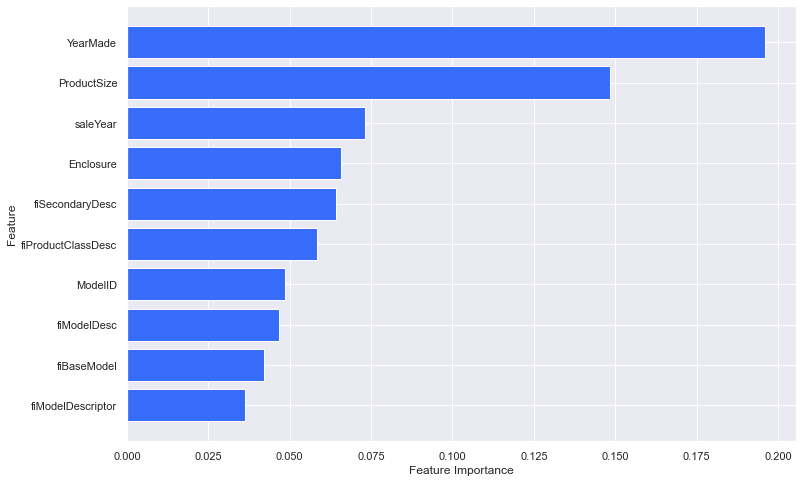

In [67]:
plot_features(x_train.columns,ideal_model.feature_importances_)